**Data reference link :**

https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik

https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits

- This is a dataset used to recognize handwritten digits.

- The dataset contains scanned images of handwritten digits.

- The dataset has a total of 10 classes, with each class representing a digit between 0 and 9.

- Data from 44 subjects, with 250 samples each, has been collected.

- The dataset includes information about which digit each image represents, in addition to the image data.

- This dataset is often used to evaluate the performance of machine learning algorithms in handwriting recognition.

- It is also a popular dataset used in the training of deep learning models.

**Pen-Based Recognition of Handwritten Digits**

- We are creating a digit database by collecting 250 samples from a total of 44 writers. Samples written by 30 writers are used for training, cross-validation, and author-dependent testing, while samples from the remaining 14 writers are used for author-independent testing. This database is also available in UNIPEN format.

- We use a WACOM PL-100V pressure-sensitive tablet with an integrated LCD screen and a wireless pen. The input and display areas are located in the same place. This tablet, connected to the serial port of an Intel 486-based computer, allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pen pressure level values at fixed time intervals of 100 milliseconds (sampling rate).

- These writers are asked to write 250 digits in random order in boxes with a resolution of 500 by 500 tablet pixels. The subject is only monitored during the first input screens. Each screen contains five boxes displaying the digits to be written. Subjects are instructed to write only within these boxes. If they make a mistake or are unsatisfied with their writing, they are instructed to clear the contents of a box using a button on the screen. Since most writers are unfamiliar with such input devices, the first ten digits are ignored, although subjects are unaware of this.

- In our study, we only use ($x, y$) coordinate data. Pen pressure level values are ignored. First, we apply normalization to make our representation invariant to translations and scale distortions. The raw data from the tablet consists of integer values between 0 and 500 (tablet input box resolution). The new coordinates are adjusted so that the coordinate with the maximum range varies between 0 and 100. Since most characters are taller than they are wide, $x$ generally remains within this range.

**Breakdown of values**
The **Pen-Digit Dataset** is a collection of data that shows how people write numbers (0 to 9) using a special tablet that can track the pen's movements.

- When someone writes a number on this tablet, the **X** and **Y** values show where the pen is on the tablet.
- **X** is like the **left-to-right** position of the pen.
- **Y** is like the **up-and-down** position of the pen.

Imagine you’re writing the number “2” on a piece of paper. As you move your pen, the tablet records **8 different points** of the pen’s movement. Each point has an X value (how far left or right the pen is) and a Y value (how far up or down the pen is).

For example:
- X1, Y1 could be where you start writing “2.”
- X2, Y2 could be the next point as you curve the pen.
- And so on, until X8, Y8, which is near the end of writing the “2.”

These numbers (X and Y coordinates) help computers understand the shape of the digit you're writing.

### Simple Example:
- You start writing “2” at the top left corner of the tablet (X1 = 10, Y1 = 80).
- You move down a bit (X2 = 12, Y2 = 60).
- You curve around (X3 = 30, Y3 = 40), and so on.

The computer uses these points to figure out: "Oh, this looks like a '2'!"

### In summary:
- The **X and Y** values are just locations showing where the pen moved while writing a number.
- The computer learns from these locations to recognize the digit.

**Feature Information**

To train and test our models, we need to represent digits as fixed-length feature vectors. A commonly used technique that leads to good results is the resampling of (x_t, y_t) points. Temporal resampling (points placed at regular intervals in time) or spatial resampling (points placed at regular intervals along the arc length) can be used here. The raw point data is already placed at regular intervals in time, but the distance between them varies. Previous research has shown that spatial resampling performs much better in obtaining a fixed number of regularly spaced points along the trajectory, as it provides better alignment between points. Our resampling algorithm uses simple linear interpolation between pairs of points. The resampled digits are represented as a sequence of T points ( x_t, y_t )_{t=1}^T placed at regular intervals along the arc length, as opposed to the input sequence placed at regular intervals in time.

Therefore, the input vector size is 2*T, which is twice the number of resampled points. In our experiments, we considered spatial resampling to T=8,12,16 points and found that T=8 provided the best balance between accuracy and complexity.

# Exploratory Data Analysis

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

## Load Dataset

In [3]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

# inputs are the x-y coordinates

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

## Explore Data

In [4]:
# To obtain a general profile of the dataset
# Number of observations-data type-number of null values-number of unique values-min-max values
# Null values appear as "0"!

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
Types
int64    17
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls  Min  Max
class    int64   10992       10      0    0    9
input1   int64   10992      101      0    0  100
input10  int64   10992      101      0    0  100
input11  int64   10992      101      0    0  100
input12  int64   10992      101      0    0  100
input13  int64   10992      101      0    0  100
input14  int64   10992      101      0    0  100
input15  int64   10992      101      0    0  100
input16  int64   10992      101      0    0  100
input2   int64   10992       96      0    0  100
input3   int64   10992      101      0    0  100
input4   int64   10992       98      0    0  100
input5   int64   10992      101      0    0  100
input6   int64   10992      101      0    0  100
input7   int64   10992      101      0    0  100
input8   int64   10992      101      0    0  100
input9   int64   10992      101      0    0  100

In [5]:
df.describe().T

# be aware of the min-25% differences in 2. and 4. features!!!

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

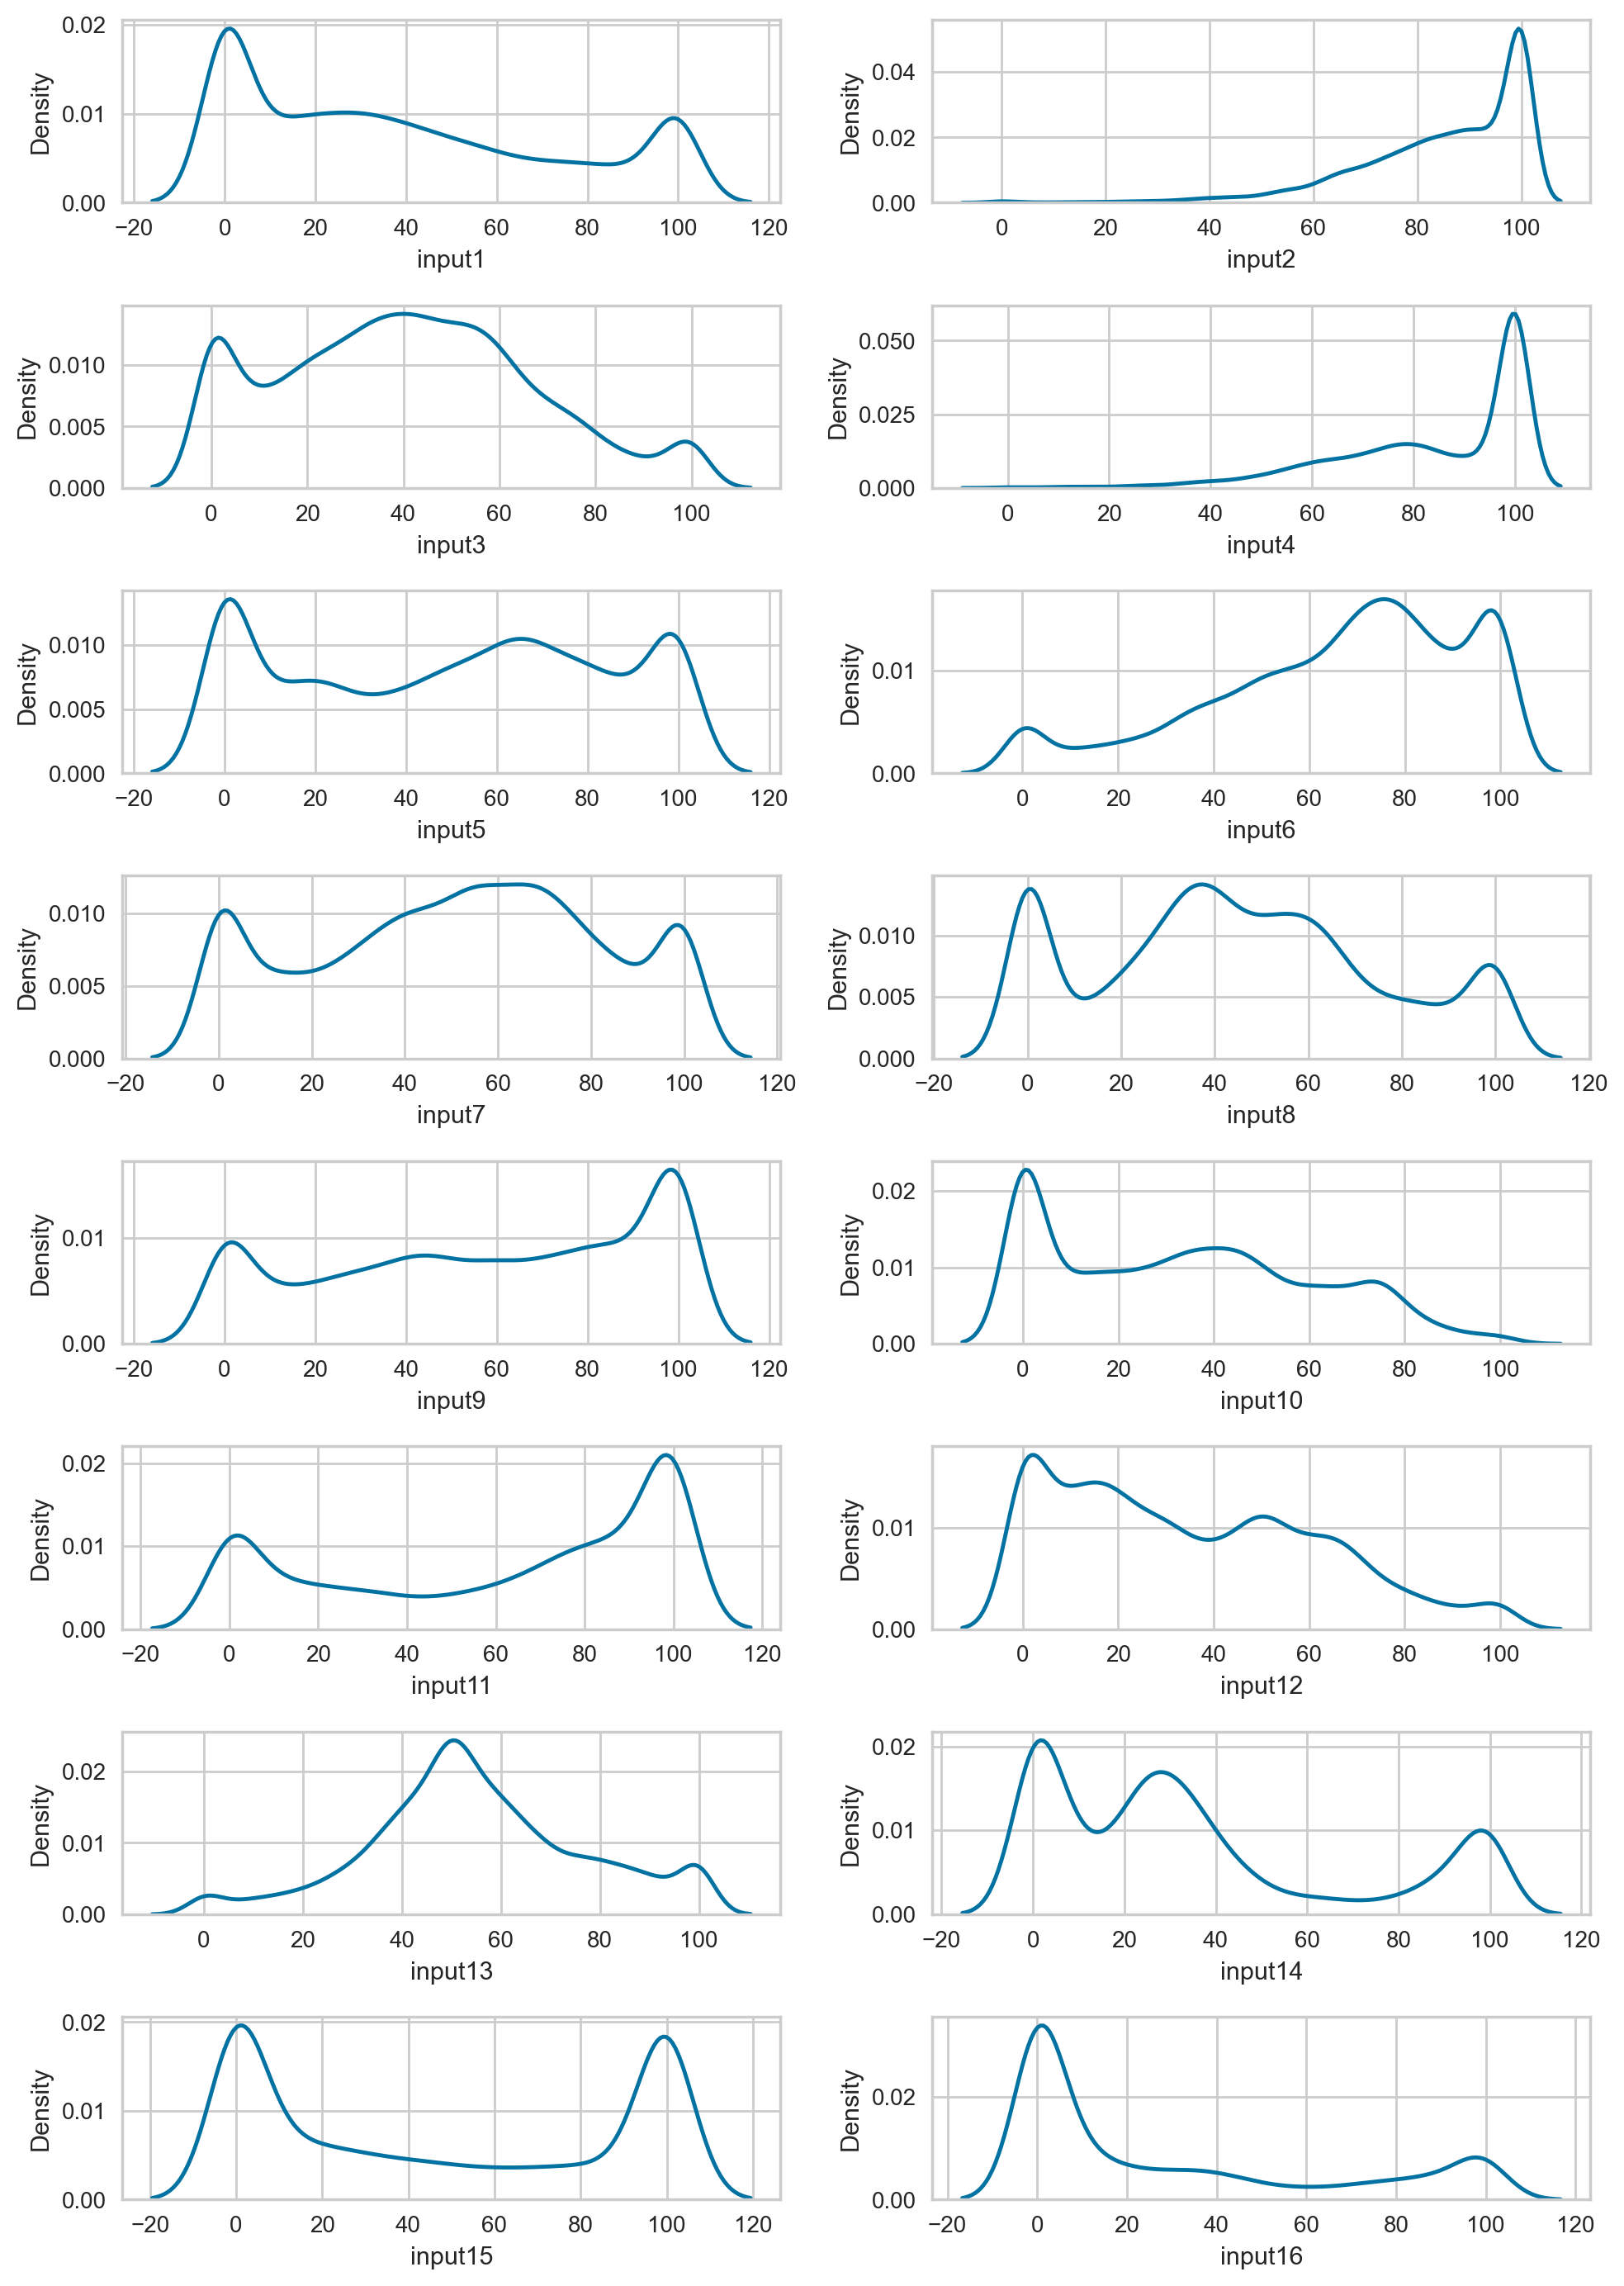

In [6]:
# We're checking to see if we can obtain an insight that will help us separate our classes

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

- Bimodal normal distribution is a distribution of a normal distribution that has two distinct peaks.

- Multimodal normal distribution is a distribution of a normal distribution that has three or more peaks.

- This type of distribution may indicate the presence of two distinct subpopulations in the dataset or that an external factor has influenced the distribution within the dataset.

- Bimodal-Multimodal normal distribution can occur when the means and standard deviations of different subpopulations are significantly different from each other.

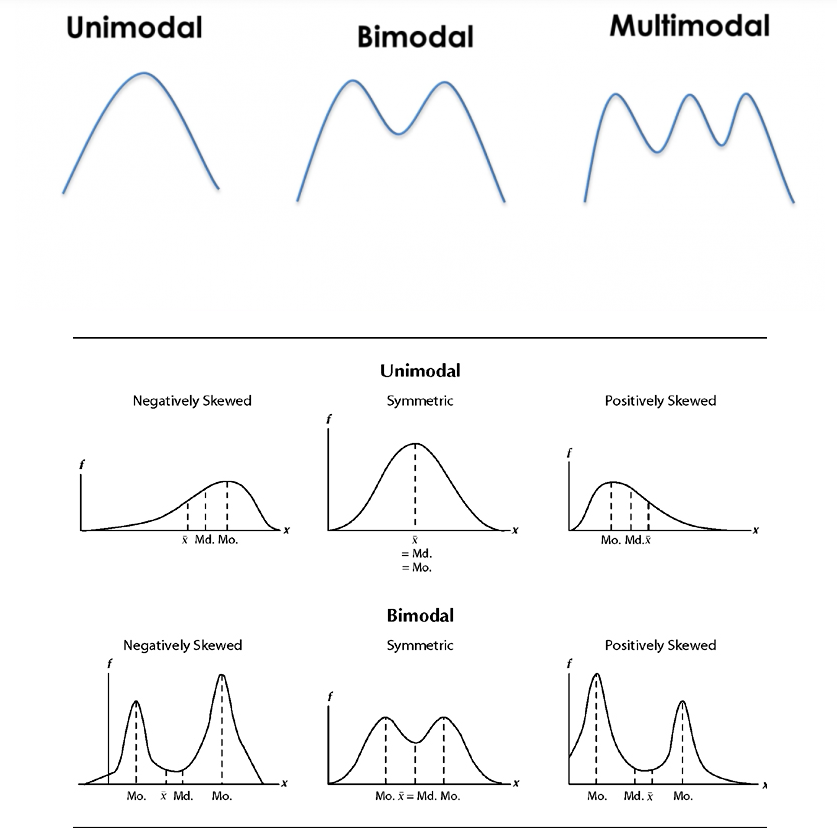

## 2.  Data Cleaning

### Detect Missing Values and Outliers

**Algorithms Less Sensitive or Resistant to Outliers:**

1. **Support Vector Machine (SVM):** SVM works by maximizing margins and ignores points within the margins (including outliers). This can make SVM resistant to outliers in some cases.

2. **Decision Tree:** Decision Trees are based on splitting criteria, and these criteria are generally not affected by outliers. However, if there are too many outliers, the tree structure and the resulting decision boundaries can be impacted.

3. **Random Forest:** Similar to Decision Trees, Random Forest works by combining multiple trees. This combination process reduces the impact of outliers.

4. **Artificial Neural Networks:** Neural networks, due to their complexity and learning capacity, can sometimes be resistant to outliers. However, this depends on the network's architecture and training data. Additionally, an overfitted model can be sensitive to outliers.

**Algorithms Sensitive to Outliers:**

1. **K-Means Clustering (K-Means):** K-Means is highly influenced by outliers because it calculates averages. Outliers can significantly shift the position of cluster centers.

2. **Hierarchical Clustering:** Similar to K-Means, hierarchical clustering can be affected by outliers, leading to imbalanced cluster structures during the clustering process.

3. **Linear Regression:** Linear regression can be influenced by outliers, as they can significantly alter the direction of the regression line.

4. **Logistic Regression:** Logistic regression can be impacted by outliers, as they can disrupt the model's prediction boundary.

5. **Ridge Regression and Lasso Regression:** Both methods include regularization. While Ridge and Lasso can reduce the sensitivity of linear regression to outliers, they can still be affected by outliers.

6. **ElasticNet Regression:** ElasticNet, which combines Ridge and Lasso, can similarly show sensitivity to outliers.

In [7]:
df.isnull().sum().any()  # no missing value

False

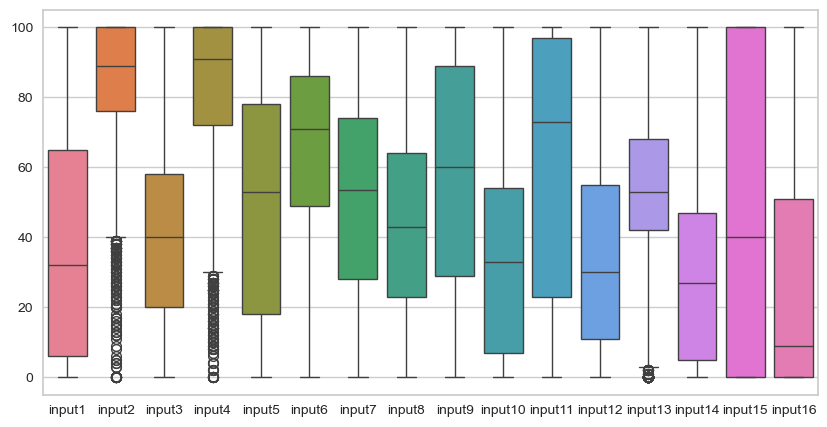

In [8]:
# plotting the box plots of all features for outlier detection
# outliers present in 2-4 ve 13. features 

plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

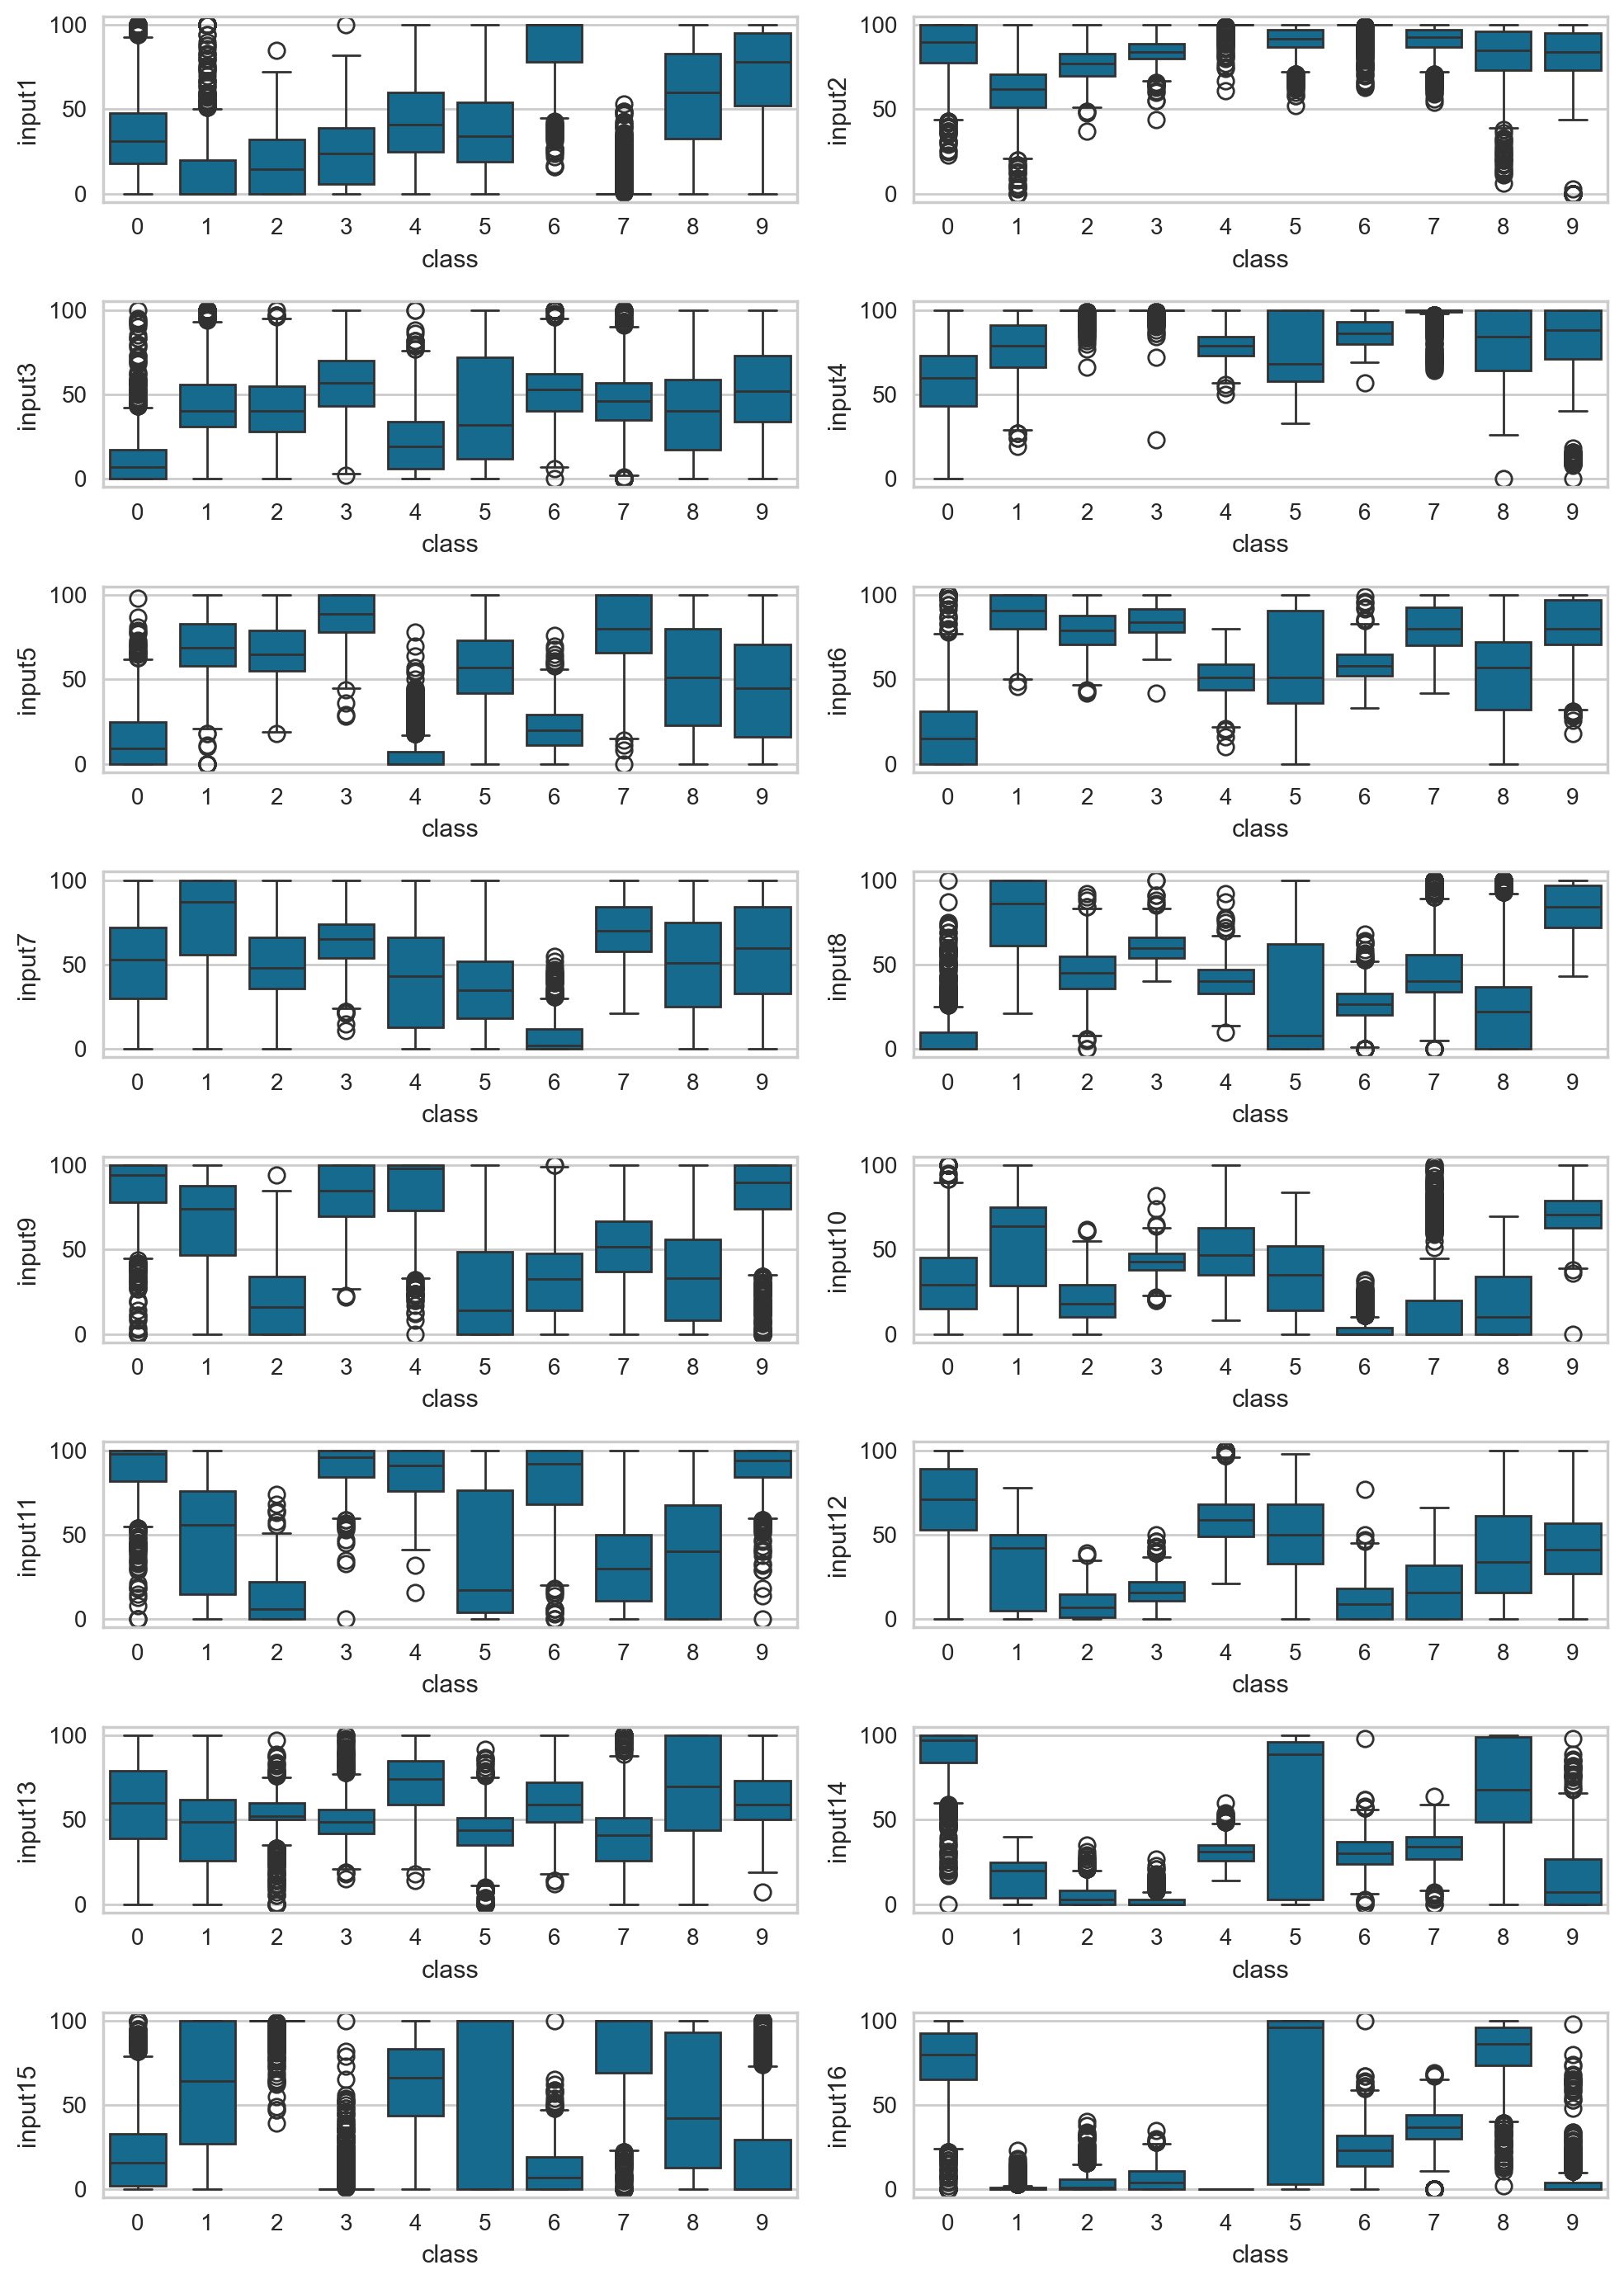

In [9]:
# To be sure about the features containing outlier values, we are plotting the boxplot of each feature by class
# To make a final decision, we need to look at the IQR values


fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

**Steps to calculate IQR:**

- The data is sorted from smallest to largest.
- The first and third quartiles, representing 25% and 75% of the data, are calculated.
- The IQR is obtained by subtracting the first quartile from the third quartile.

The code first converts the values in a specific column of a pandas DataFrame into a Numpy array (using the `tolist()` function). Then, using the `np.percentile()` function, it calculates the 25th percentile value of the specified column in the array. This value is assigned to the variable `first_quartile`.

**Tukey** is a concept used in statistical data analysis to detect outliers.

It refers to a coefficient that determines how far a value must be from the IQR to be considered an outlier. The default value is 1.5.

This means that any data point that is more than 1.5 times the distance between the lower and upper quartiles will be considered an outlier.

The function calculates the IQR of the column data and then multiplies it by the specified Tukey coefficient to compute the lower and upper bounds.

Next, it iterates over the data, checks if each value is outside these bounds, and counts these values using a counter.

In [10]:
# We can create a function to get the number of outliers for each class in order.
# For practicality, we are finding outliers for features without considering class separation.


def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [11]:
# setting the threshold or tukey as 1.5 

threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

In [12]:
out_cols

['input2', 'input4', 'input13']

In [13]:
df1 = df.copy()       # what if we drop the outliers

In [14]:
# to drop the outliers beyond the 1.5 IQR 

for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [15]:
df1.shape

(10450, 17)

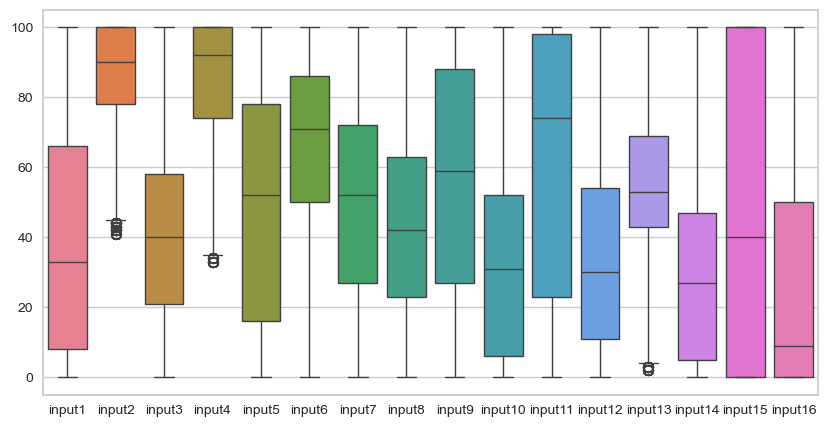

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [17]:
len(df) - len(df1)

542

### My target column is `class`. So let's take a close look at this column.

In [18]:
# # Prints how many times the values from 0 to 9 in the 'class' column are repeated

for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


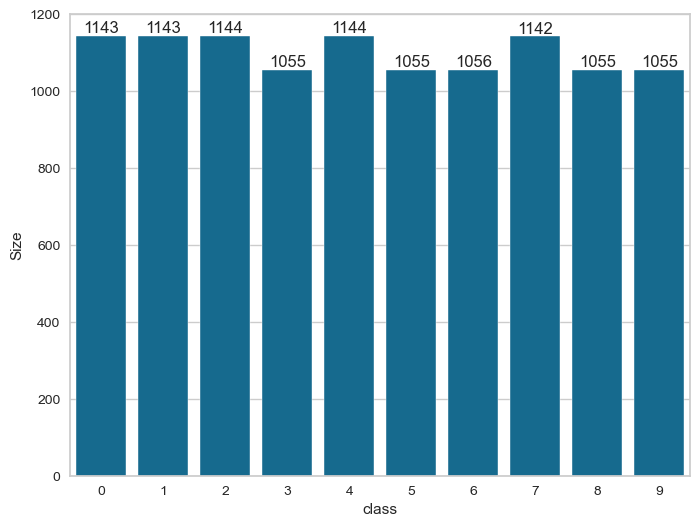

In [19]:
# We can see that we have balanced data (class).
# However, in addition, I want to check the percentage distribution of each class.


class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

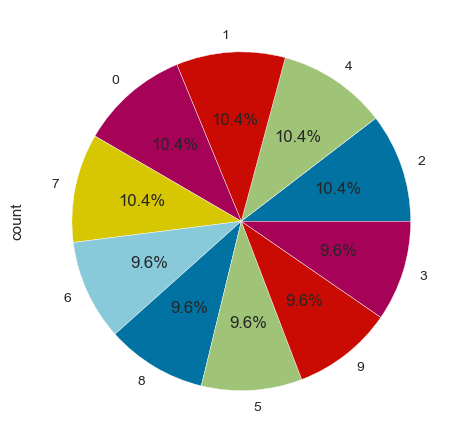

In [20]:
df["class"].value_counts().plot.pie(autopct='%1.1f%%');

### Now, let's take a closer look at correlation of continuous columns.

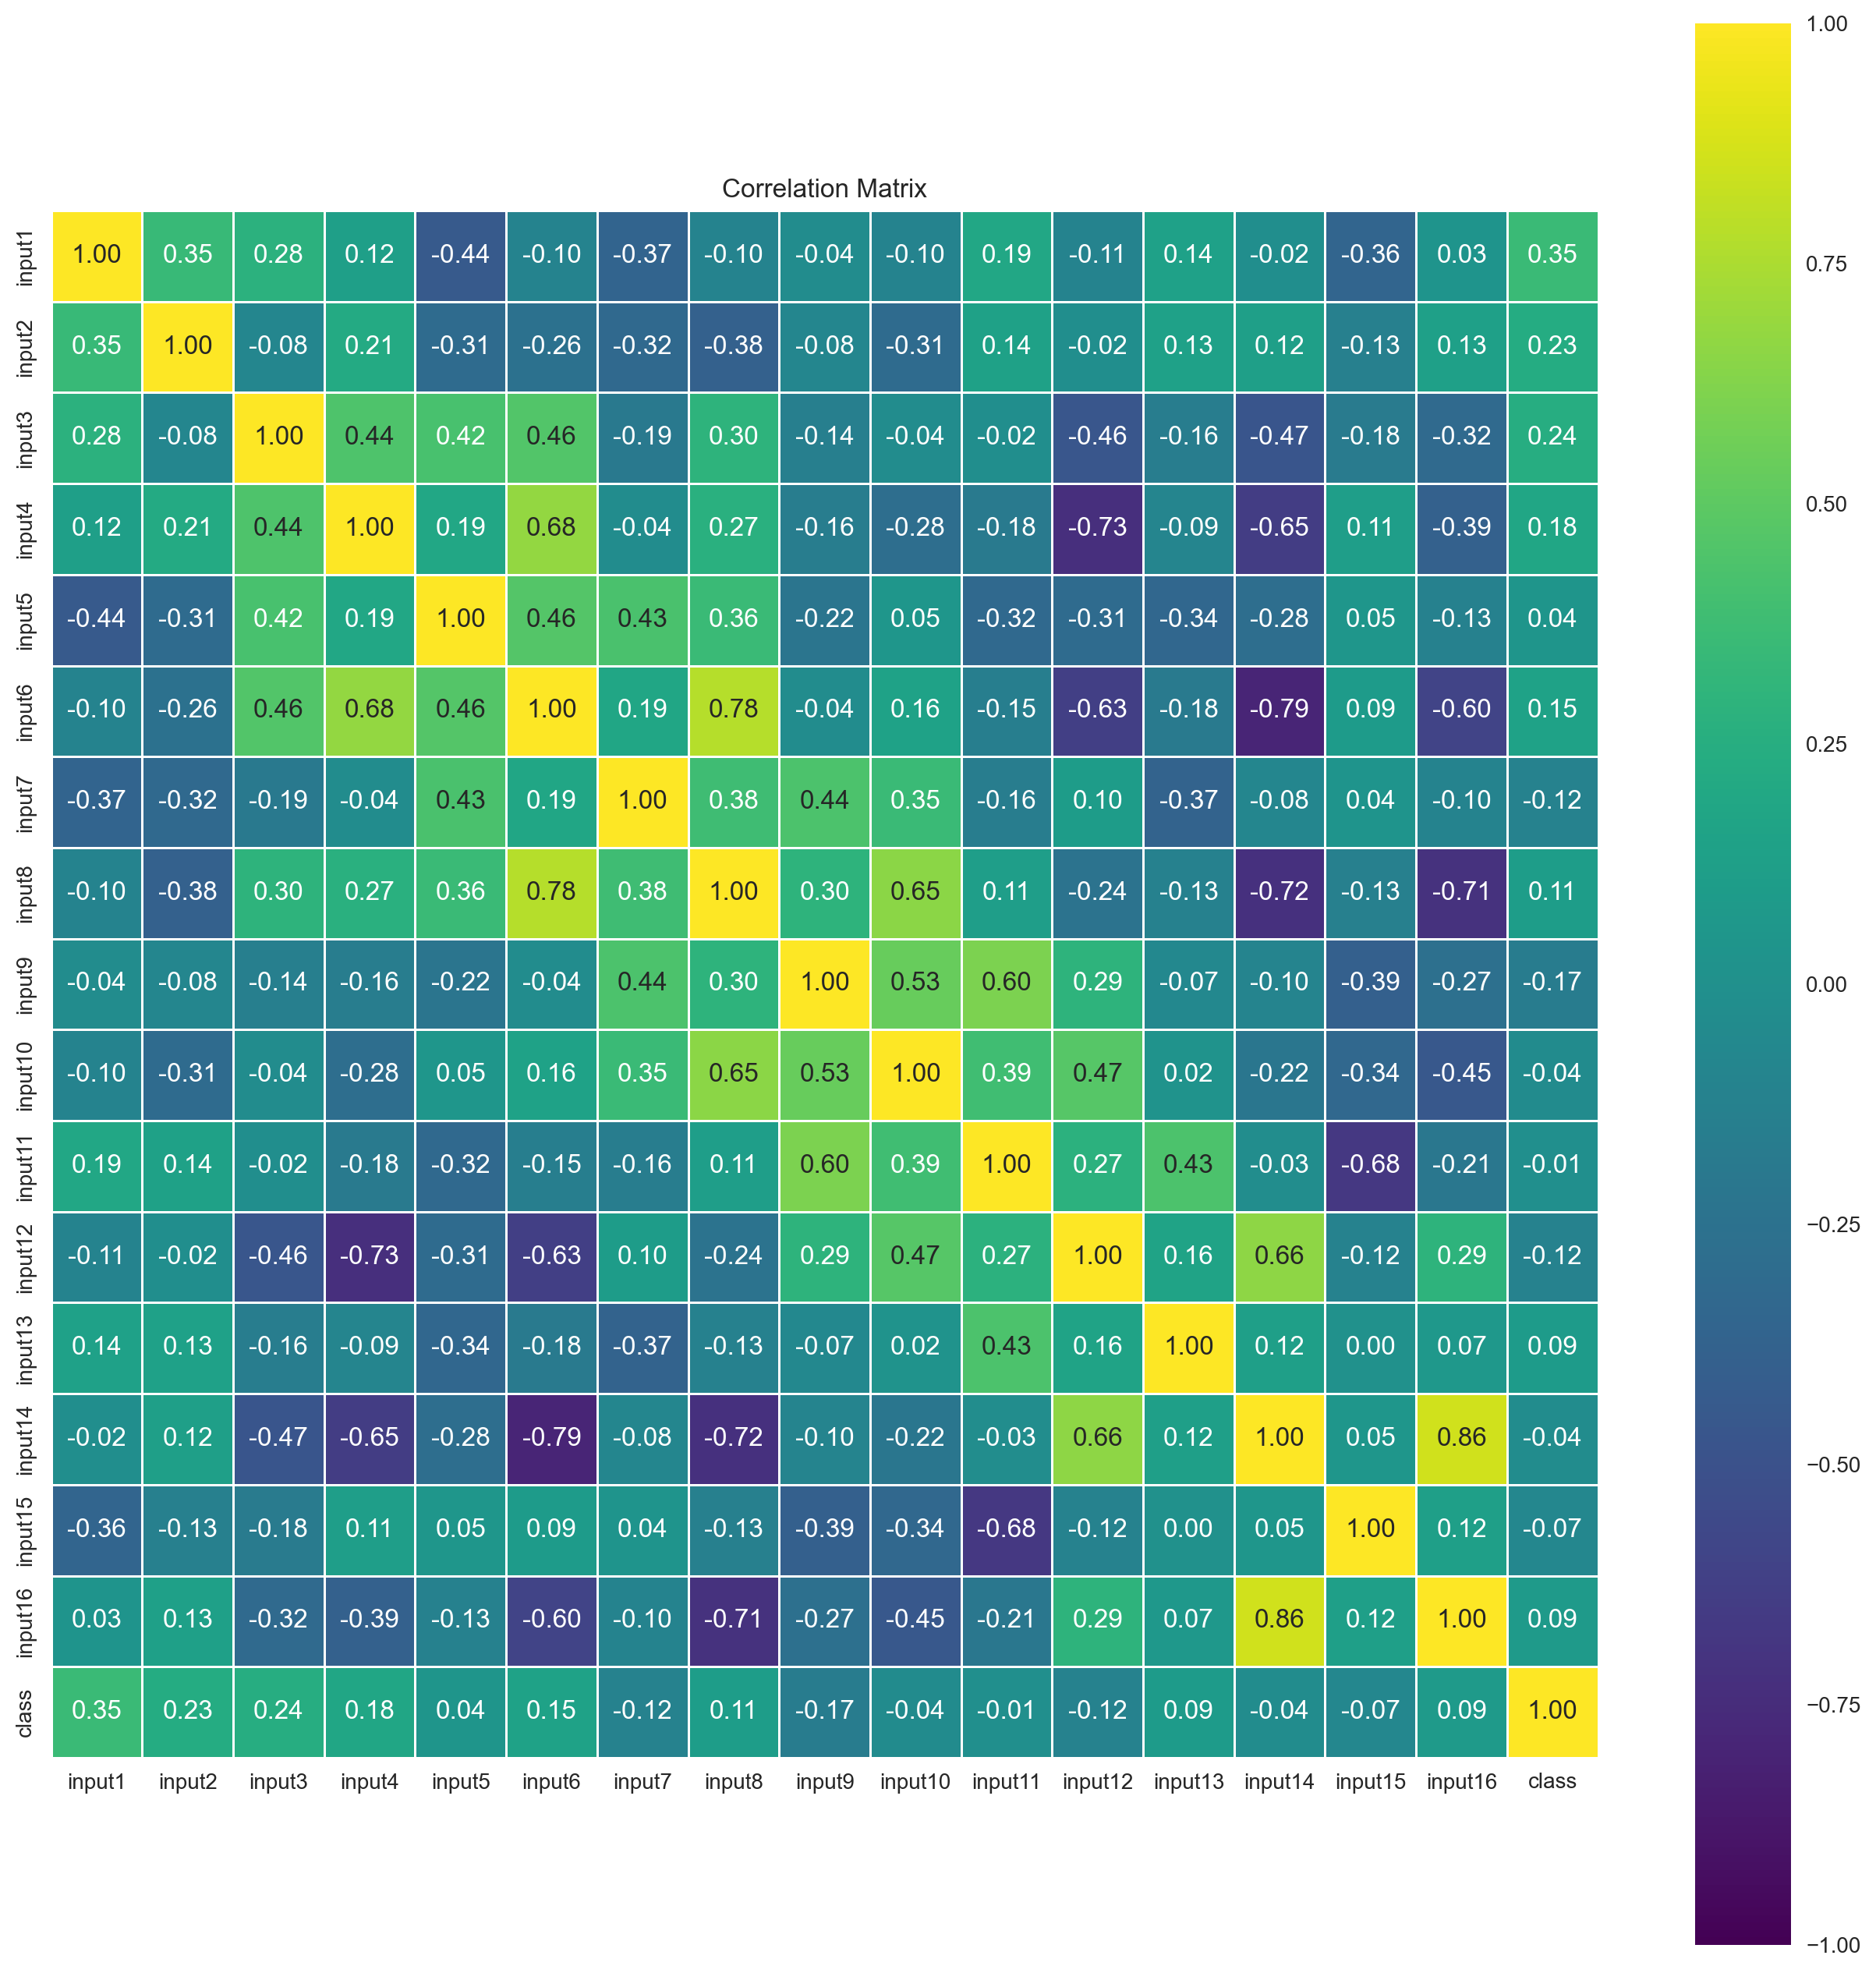

In [21]:
# There is no correlation below or above 0.80
# even if it exists, multicollinearity is not a problem in tree-based models


corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

In [22]:
# It is good to save our dataset as a CSV file from time to time, especially after EDA, so we don't have to rerun it from scratch

df.to_csv("handdigit_EDA.csv", index = False)

# The index=False parameter transfers the other columns of the df to the CSV file without including the index column.
# This parameter makes the file more organized and easier to understand.


# Multi-class Classification

### Data Preprocessing

In [23]:
df = pd.read_csv("handdigit_EDA.csv")

In [24]:
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [25]:
X = df.drop("class", axis = 1)
y = df["class"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# The "shuffle=False" parameter ensures that the data is split directly into partitions without being randomly shuffled
# By default, shuffle is True, and it shuffles the data before performing the train-test split
# To prevent data leakage through classes, we need to split the data without shuffling
# If we use shuffle, the same handwritten digits from the same person could be in both sets
# Overlap between the test and train sets can lead to leaky validation
# This parameter is especially useful when working with data that has a chronological order, such as financial time series


## Implement Support Vector Machine



**SVM (Support Vector Machine)** is a classification and regression algorithm.

- It is suitable for small or medium-sized datasets.

- Since it is a distance-based model, it is sensitive to scaling. Therefore, scaling is necessary.

- The basic logic of SVM is to find a hyperplane that best separates the data for classification.

- SVM represents the data in a space and defines boundaries with one or more hyperplanes in this space. A hyperplane is the best separation line that divides the data into two classes. This line should provide the largest distance (margin) between the classes. SVM works to maximize this margin.

- SVM also uses kernel functions when working with non-linear data. Kernel functions allow the data to be represented in high-dimensional spaces. In this way, SVM can achieve higher accuracy when classifying more complex and non-linear data.

https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

**So, What Happens in Multiclass?**
- The SVM algorithm is designed for binary classification. However, it can also be used for multiclass classification problems. In multiclass classification, SVM works by using multiple binary classifiers.

- This approach is known as "one-vs-all (rest)" (OvR) or "one-vs-one" (OvO).

- The OvA approach treats each class separately from the rest, and the classifier tries to distinguish each class from the others. The OvO approach creates a classifier between every two classes, and the outputs of all classifiers are combined to determine the most frequent class.

- For example, in a 3-class classification problem, the OvA approach first creates a classifier that tries to separate class 1 from the others, then creates a classifier for class 2, and finally for class 3. The outputs of the classifiers are combined to determine the class.

- The OvO approach works by creating a classifier between every two classes. For example, in a 3-class classification problem, a classifier is created between class 1 and class 2, class 1 and class 3, and class 2 and class 3. The results from the classifiers are combined, and the most frequent class is selected.
https://www.baeldung.com/cs/svm-multiclass-classification

https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/

https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02   

### Vanilla SVC

In [27]:
scaler = MinMaxScaler()           # defining to use with a pipeline

In [28]:
SVM_model =  SVC(kernel="rbf", random_state=101)

# RBF (Radial Basis Function); is a Kernel Trick method that calculates how similar each point is to a specific point using a normal distribution,
# and classifies accordingly.
# It is used to measure the similarity between two examples.
# It is especially useful for datasets that are not linearly separable.
# The RBF kernel transforms the data into a higher-dimensional space, helping to create a linear classification boundary in this higher-dimensional space.
# This allows SVM to solve even problems that are not linearly separable.


In [29]:
from sklearn.pipeline  import Pipeline

SVM_model = Pipeline([("scaler",scaler),("SVM",SVM_model)])

In [30]:
SVM_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(random_state=101))])

In [31]:
# taking predictions of both train and test to check for overfitting

y_pred_test = SVM_model.predict(X_test)
y_pred_train = SVM_model.predict(X_train)

**Performance Evaluation in Multiclass Classification**

- When evaluating machine learning models, we use different metrics to understand how successful the model is.

- Especially in multiclass classification problems (where there are multiple classes), performance evaluation becomes a bit more complex. At this point, the **average parameter** comes into play, determining how we aggregate the performance across different classes.

**Different Average Methods:**

**Macro Average:** Takes the average of the metric (e.g., F1-score) calculated for each class. This method is preferred when all classes are equally important and class imbalance (some classes having many more examples than others) might cause issues. It calculates the performance metric for each class separately and then takes the arithmetic average of these metrics.

**Micro Average:** Combines the contributions of all classes to calculate a single metric. This method is used when class imbalance is not important and the focus is on overall performance. It gives more weight to larger classes. It calculates the total true positives, false positives, and false negatives across all classes and then computes a single metric using these totals.

**Weighted Average:** Weights each class's metric in proportion to the number of examples of that class in the dataset. This method is used when we want to account for class imbalance and consider the importance of each class. It calculates the performance metric for each class separately and then weights these metrics according to the proportion of each class in the dataset.

**None:** Calculates and presents the metrics for each class separately. This method is useful when we want to examine the performance of each class in detail.

**Which Average Method Should I Use?**

Choosing the right average method depends on the nature of your problem and your objectives.

**If Classes Are Equally Important and Balanced:** Use macro average.

**If Class Imbalance Is Unimportant and Overall Performance Matters:** Use micro average.

**If Class Imbalance Is Important and the Importance of Classes Differs:** Use weighted average.

**If You Want to Examine Each Class's Performance in Detail:** Use the none option.

**Accuracy and Average:**

**Accuracy** is calculated directly across all classes, so the accuracy_score function does not use the average parameter.

However, if there is class imbalance, accuracy can be misleading.

**In Summary:**

- In multiclass classification problems, the average parameter determines how we aggregate the performance across different classes.

- Choosing the right average method depends on the nature of your problem and objectives. Therefore, it's important to consider the average parameter when interpreting metrics and evaluating model performance.

In [32]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.990450204638472, 0.995678380529967, 0.9904537211561903, 0.9956930837146494)

In [33]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))


TEST CM
 [[219   0   0   0   0   0   0   0   2   0]
 [  0 224   4   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 240   2   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 901   6   5   1   0   0   1   0   0]
 [  0   3 915   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 899   2   0   1   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

#### SVC GridsearchCV

**C:** It is the regularization parameter. The larger this parameter, the lower the classification error, but at the same time, the risk of overfitting increases. Choosing a small value for this parameter can provide better generalization performance. We used C to determine the hard margin-soft margin. If the model is overfitting, the value of C should be reduced.

**gamma:** It was the kernel parameter. It controls the kernel width used in RBF, polynomial, and sigmoid kernels. If the data is not linear but nonlinear, we add a kernel to separate the data. Low gamma values define a wider area of influence, so the decision boundary will be smoother. High gamma values define a more limited area of influence, so the decision boundary may be closer to the data, but the risk of overfitting increases.

A low gamma value defines the proximity of two points and draws a smoother decision boundary. A high gamma value only affects very close points and draws a more circular decision boundary. With **gamma='scale'**, the data is scaled so that each feature has the same weight for gamma, even if they are on different scales.

If the model is overfitting, we should decrease the gamma value, and if the model is underfitting, we should increase the gamma value.

**kernel:** It is used to make the data linearly separable by transforming it into a higher-dimensional space when the dataset cannot be separated linearly. Kernels such as linear, polynomial, RBF (Gaussian), and sigmoid can be used.

**degree:** It is only used for the 'poly' (polynomial) kernel. It specifies the degree of the polynomial. For example, degree=2 represents a second-degree polynomial. The default value is 3.

**decision_function_shape:** It is an important hyperparameter of SVC. This parameter determines the strategy used in multiclass classification.

There are two main options: **'ovo' (one-vs-one)** and **'ovr' (one-vs-rest)**.

'ovo' trains a separate classifier for each class pair, while

'ovr' trains a single classifier for each class against all other classes.

In [34]:
param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [35]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf", probability=True))]) 

# why didn't we give the cv as 5 or 10 ??
SVM_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

SVM_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [36]:
SVM_model_grid.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [37]:
SVM_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVM', SVC(C=1.3, probability=True))])

In [38]:
# predicting using the grid model

y_pred_test = SVM_model_grid.predict(X_test)
y_pred_train = SVM_model_grid.predict(X_train)

In [39]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

# the scores are very close to eachother hence we can say that svm model gives a good result

(0.992269213278763, 0.9963607414989196, 0.9922812920945271, 0.9963642363445118)

In [40]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[220   0   0   0   0   0   0   0   1   0]
 [  0 225   3   0   0   0   0   1   0   0]
 [  0   1 224   0   0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   1]
 [  0   0   0   0 241   1   0   0   0   0]
 [  0   0   0   3   0 206   0   0   0   1]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   0   0   0   0   0 221   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   3   1 218]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[920   1   0   0   0   0   1   0   0   0]
 [  0 902   6   4   1   0   0   1   0   0]
 [  0   1 917   0   0   0   0   1   0   0]
 [  0   1   2 830   0   1   0   1   0   1]
 [  0   0   0   0 902   0   0   0   0   0]
 [  0   0   0   2   0 840   0   0   1   2]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   0   0   0   0   0 919   0   0]
 [  0   0   0   0   0   1   0   1 854   0]
 [  0   0   0   0   0   0   0   1   0 832]]
TEST REPORT 
               precision    recall  f1-score

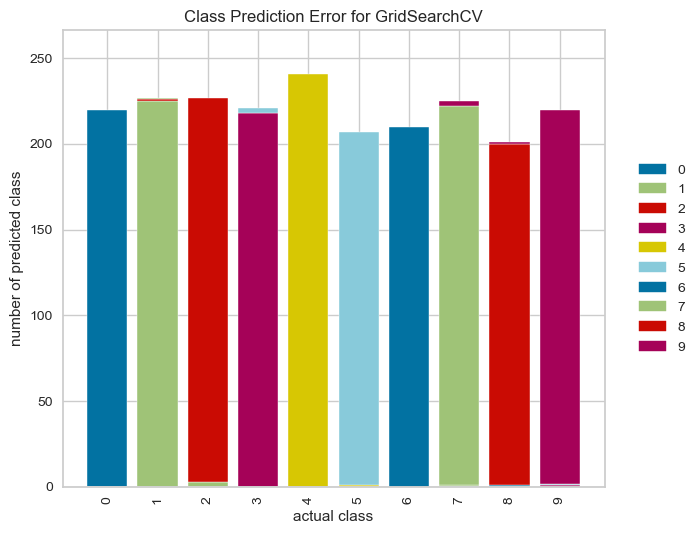

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [41]:
# So, in which class did it make the most errors??
# From the graphs, we can see that most classes were predicted correctly.
# However, the model predicted classes 2-3-7 worse compared to others.


visualizer = ClassPredictionError(SVM_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

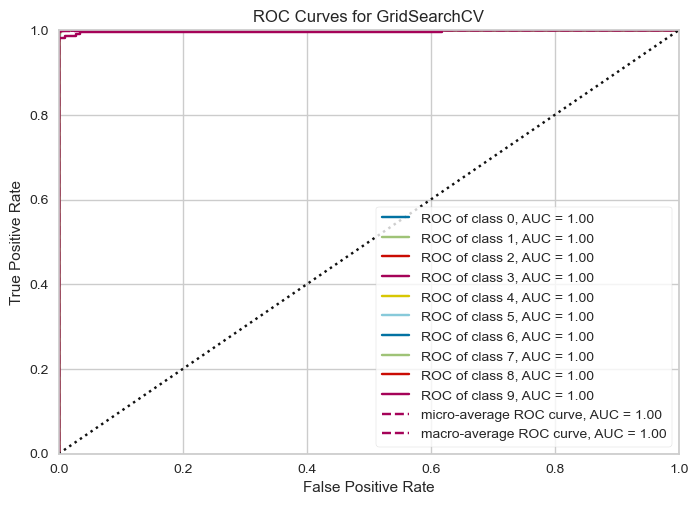

In [42]:
visualizer = ROCAUC(SVM_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

**classes=[str(i) for i in range(10);**
- It is used to specify class labels for a classification problem. 
- The classes parameter takes a list representing the class labels. Here, range(10) creates an array containing numbers from 0 to 9. 
- The str(i) expression converts each number to a string and adds it to the list. 
- In this way, class labels are set as strings and used for visualization.


In [43]:
# This code evaluates the performance of the svm_model_grid model's test set predictions 
# using the multiclass log-loss (multiclass cross-entropy) metric.


from sklearn.metrics import log_loss

y_pred = SVM_model_grid.predict_proba(X_test)
log_loss_score = log_loss(y_test, y_pred)
print("Log loss score: ", log_loss_score)

Log loss score:  0.033340115493253976


**Precision-recall curves** are used in binary classification problems.

In this case, to evaluate the performance of a multiclass classification, you can use a different metric, such as multiclass log-loss.

**Log loss** is a metric used to evaluate the performance of classification models.

It measures how well a model performs based on the probability scores it correctly assigns. Specifically, it measures how accurate the predicted probabilities are compared to the true labels (classes).

The `predict_proba()` method in multiclass classification models makes probability predictions for each class individually. Therefore, the predictions from the `svm_model_grid` model are assigned to the `y_pred` variable using the `predict_proba()` method.

Then, the predicted probabilities are compared to the actual target values, `y_test`, using the `log_loss()` function, and a log-loss score is obtained. The log-loss score measures how well the model predicts the actual values, and the lower the score, the better the model performs.

The ideal score is 0, which indicates perfect classification. A high log-loss value indicates that the model's predictions are quite different from the actual labels.

Log loss not only considers whether predictions are correct or incorrect but also how confident the model is about these predictions. Therefore, log loss is useful when you want to obtain probability estimates.

It can be used with models such as SVM, Logistic Regression, Decision Trees, Random Forest, GB, XGBoost, and KNN.

## Implement Decision Tree Classifier

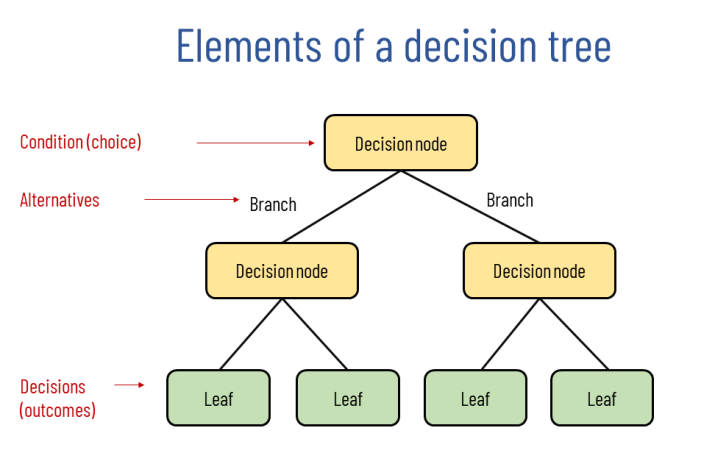

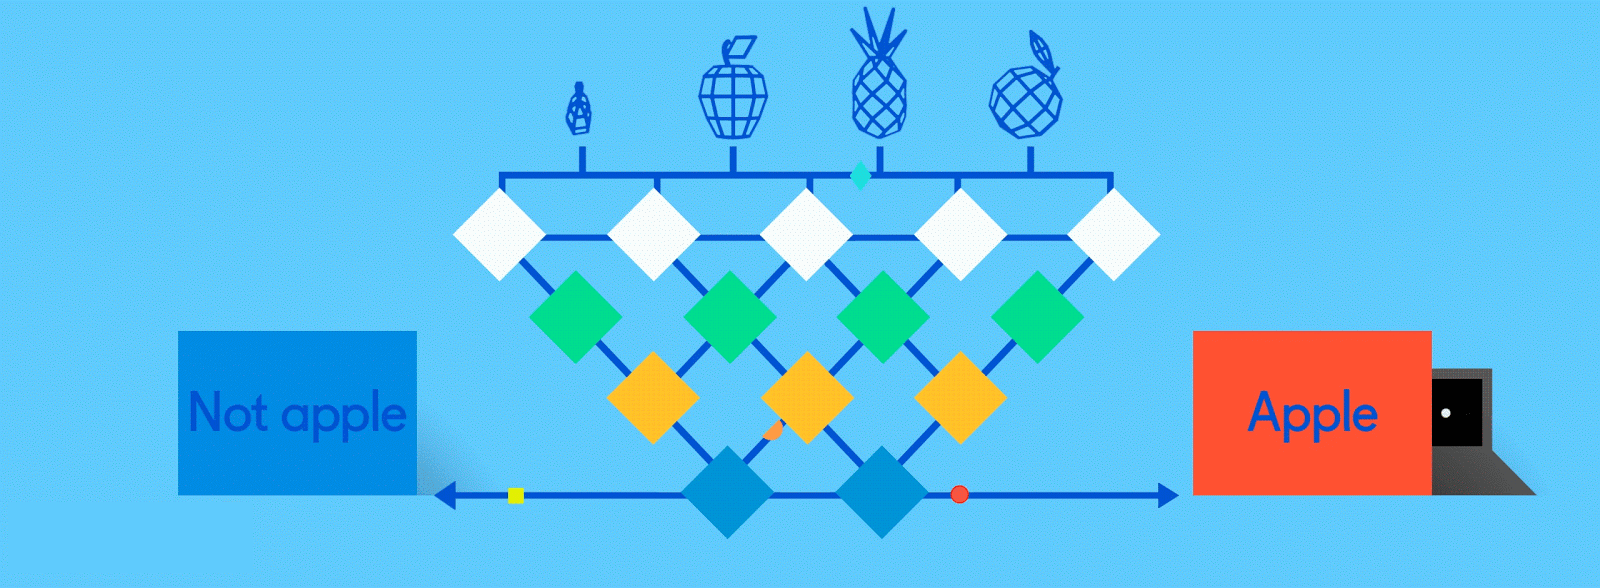

**Decision Tree (Karar Ağaçları) Basics**

- Decision Trees are a hierarchical structure where features are split based on a specific sequence or hierarchy. The tree starts with the root node at the top and is eventually divided into leaf nodes corresponding to the values of the target variable.
- At each node, a feature splits the data based on a specific criterion (usually a threshold). This splitting criterion is typically based on metrics like information gain, Gini impurity, or entropy.

1. **Definition**: Decision Trees are models used for classification and regression problems, which are easy to understand visually and interpret. A decision tree splits the data into smaller subsets while applying a set of decision rules.

2. **Working Principle**: A decision tree starts with a root node at the top and splits the dataset into branches based on features. Each branch corresponds to a decision made on a feature, and these branches continue until they reach leaf nodes or result nodes.

3. **Splitting Criteria**: Decision trees use various algorithms to determine the best features and split points for dividing the dataset. The most common splitting criteria are Gini impurity, entropy, and information gain.

Of course, Gini index, information gain, and entropy are three important metrics used to determine splits in decision trees. Let's explain what each one is and the relationship between them:

**Entropy**
- **Definition**: Entropy measures the disorder or uncertainty in a system. In the context of decision trees, it indicates how mixed the classes are in a node.

- **Usage**: If the entropy of a node is high, the data in that node is mixed and requires more splitting.

**Information Gain**
- **Definition**: Information gain measures the reduction in entropy resulting from a feature split. It indicates how much "information" a feature provides by splitting the dataset.
- **Calculation**: The information gain of a feature is equal to the reduction in entropy caused by using that feature:
  \[ Information Gain = Entropy(before) - Entropy(after) \]
- **Usage**: A feature with high information gain is effective at splitting the dataset and is preferred in decision trees.

**Gini Index (Gini Impurity)**
- **Definition**: Gini index measures how often classes are misclassified within a node. A low Gini index means the node is more homogeneous.

- **Usage**: A feature with a low Gini index provides better class separation, indicating a preferred split.

**Relationships and Differences**
- **Entropy and Information Gain**: While entropy measures the disorder of a node, information gain measures how much this disorder is reduced by a feature. High information gain indicates a large reduction in entropy.
- **Gini Index and Entropy**: Both the Gini index and entropy measure purity in a node, but they use different formulas. Gini is often faster to compute, making it preferred for large datasets.
- **Choice**: When building decision trees, a choice is made between Gini index and entropy. Both can produce similar results, but their performance may vary depending on the dataset and situation.

**Advantages and Disadvantages of Decision Trees**

**Advantages:**
- **Easy to Understand**: Decision trees make it easy to understand how the model makes predictions.
- **Minimal Data Preprocessing**: They generally do not require data preprocessing steps like normalization or scaling.

**Disadvantages:**
- **Prone to Overfitting**: Decision trees tend to overfit the training data, reducing the model's ability to generalize.
- **Tree Stability**: Small changes in the dataset can lead to significant changes in the tree structure.

**Applications and Improvements**

- **Random Forest and Boosting Methods**: These methods help reduce the overfitting problem of decision trees. Random Forest combines multiple decision trees, while boosting methods iteratively strengthen weak decision trees.
- **Feature Importance**: Decision Trees provide a "feature importance" metric to measure the impact of each feature on the target variable. This helps identify the most important features for the model.
- **Use Cases**: Decision trees are used in customer segmentation, credit risk assessment, medical diagnosis, and many other fields.

**Best Practices**

- **Limit Tree Depth**: Limiting the depth of the tree is important to avoid overfitting.
- **Pruning**: Pruning techniques are used to control tree growth and reduce overfitting.
- **Cross Validation**: Cross-validation techniques should be used to assess the model's generalization ability.

### Vanilla DT

In [44]:
DT_model = DecisionTreeClassifier(random_state=101)

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [45]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

In [46]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9472487494315598, 1.0, 0.9472437195988315, 1.0)

In [47]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[220   0   0   0   0   0   1   0   0   0]
 [  0 211  16   1   1   0   0   0   0   0]
 [  0   5 216   0   0   1   0   3   0   0]
 [  0   6   1 207   0   3   0   0   0   2]
 [  0   0   0   0 236   4   0   0   0   2]
 [  0   0   0   7   1 194   0   1   1   6]
 [  4   1   1   0   0   2 198   0   3   1]
 [  0  10   5   2   0   0   3 201   1   0]
 [  7   0   0   0   0   1   0   0 191   0]
 [  0   0   0   2   1   5   0   4   1 209]]
              precision    recall  f1-score   support

           0      0.952     0.995     0.973       221
           1      0.906     0.921     0.913       229
           2      0.904     0.960     0.931       225
           3      0.945     0.945     0.945       219
           4      0.987     0.975     0.981       242
           5      0.924     0.924     0.924       210
           6      0.980     0.943     0.961       210
           7      0.962     0.905     0.933       222
           8      0.970     0.960     0.965       199
           9    

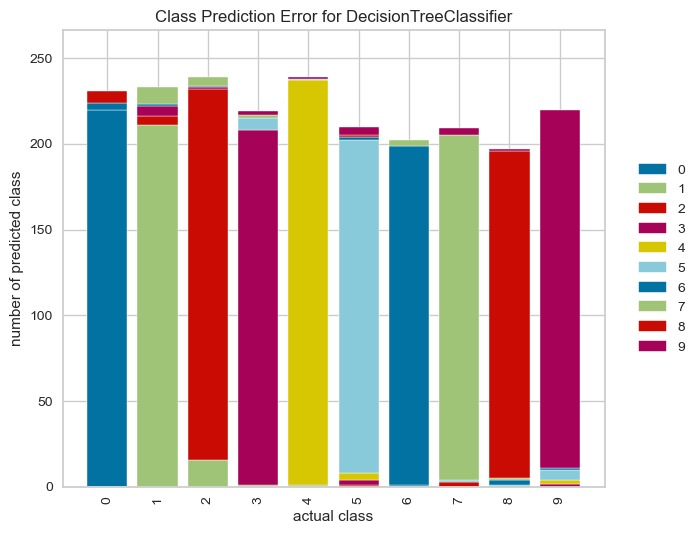

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [48]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### DT GridsearchCV

1. **criterion**: Specifies the metric used to evaluate each split in the decision tree. Typically, it takes two values:
   - **Entropy**: Based on information gain, measures the disorder of the dataset. Higher entropy means more disorder.
   - **Gini**: Uses Gini impurity and shows how mixed the classes are within a node. A lower Gini value provides better separation.

2. **splitter**: Determines the splitting strategy at each node. There are two main options:
   - **"best"**: Finds the best split at each node (with the lowest Gini or entropy).
   - **"random"**: Selects splits randomly, which can increase the model's variance.

3. **max_depth**: Specifies the maximum depth of the tree. This parameter limits the maximum number of levels from the root to the leaf nodes. It usually takes a positive integer, or if set to 'None', allows unlimited depth. Limiting the depth can help prevent the model from overfitting.

4. **max_features**: Specifies the maximum number of features to consider at each split. Possible values include:
   - Integer (n): A maximum of n features.
   - Float (between 0.0 and 1.0): A percentage of the total features.
   - **"auto"**: Uses all features.
   - **"sqrt"**: Uses the square root of the number of features.
   - **"log2"**: Uses the log2 of the number of features.

5. **max_leaf_nodes**: Specifies the maximum number of leaf nodes to be created. This parameter can take an integer value or be set to 'None' (which allows unlimited leaf nodes). It helps control the complexity of the model and prevents overfitting.

6. **min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node. This can be an integer or a minimum percentage of samples at each node. It prevents the model from overfitting by ensuring that leaf nodes are not too small.

7. **min_samples_split**: Specifies the minimum number of samples required to split a node. This can be an integer or a minimum percentage of samples required for splitting. It also helps prevent overfitting by avoiding splits with too few samples.

In [49]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             }

In [50]:
DT_model = DecisionTreeClassifier()
DT_grid_model = GridSearchCV(DT_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

DT_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200]},
             scoring='accuracy', verbose=2)

In [51]:
DT_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180}

In [52]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [53]:
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

DT_accuracy_test, DT_accuracy_train, DT_f1_test, DT_f1_train

(0.927694406548431, 0.9648584100989424, 0.9278096672362848, 0.9646826401539924)

In [54]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[213   0   0   0   0   0   2   0   6   0]
 [  0 204  21   2   0   0   0   2   0   0]
 [  0   5 214   3   0   1   2   0   0   0]
 [  0   1   1 211   0   1   1   0   0   4]
 [  2   1   0   0 221   0   2   0   0  16]
 [  0   2   0   9   0 164   0   1   1  33]
 [  0   0   2   0   1   4 202   0   1   0]
 [  0   8   1   5   0   0   1 198   5   4]
 [  1   0   0   0   0   1   0   0 197   0]
 [  0   0   0   1   0   1   0   3   1 216]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[919   0   0   0   1   1   0   0   1   0]
 [  0 839  38  22   0   1   0  13   0   1]
 [  0  14 896   7   0   2   0   0   0   0]
 [  0   3   4 824   1   0   0   0   0   4]
 [  0   2   0   0 874   0   8   0   0  18]
 [  0   0   0   7   2 758   0   0   1  77]
 [  0   4   0   1   4   1 836   0   0   0]
 [  0   0   5  46   0   0   1 863   2   3]
 [  0   0   0   2   0   0   0   0 854   0]
 [  0   4   0   2   1   2   1   1   1 821]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

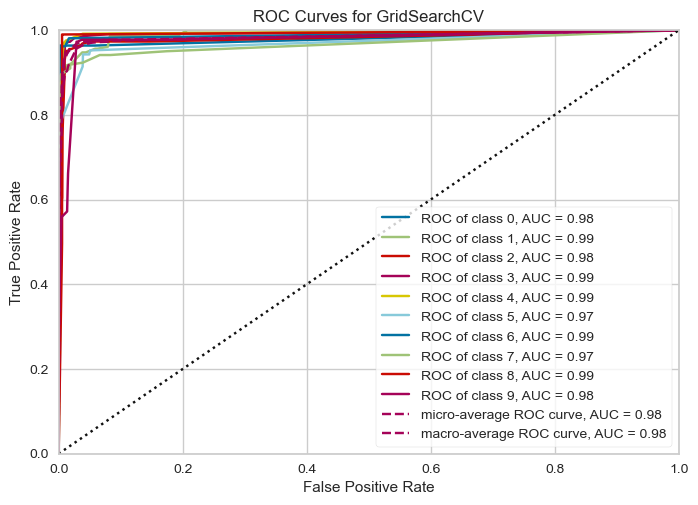

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

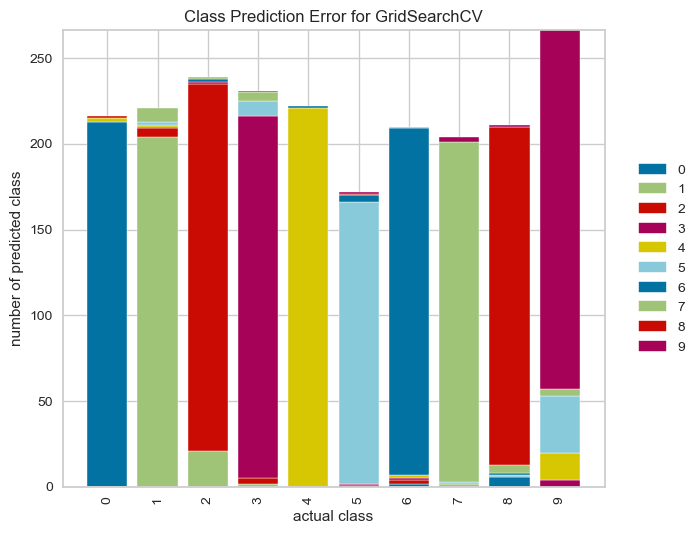

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [56]:
visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## Implement Random Forest Classifier


Random Forest eliminates the disadvantages of Decision Trees.

**Random Forest** allows you to build multiple models by training each decision tree on a different sample of observations, creating a variety of models that contribute to classification.

In a Decision Tree (DT), predictions are made using the most powerful feature, which can increase variance and lead to overfitting. Random Forest was developed to address this issue.

Since it uses a rule-based approach, data normalization is not necessary.

Due to the large number of solutions (trees) it generates, it produces results somewhat slowly (training is fast, but prediction is slow), especially for real-time predictions.

In Random Forest, for each subset of the training set that is randomly selected, features are also randomly selected, and separate DT models are built. This means that the same strong feature is not always used, and different random features are used each time.


### Vanilla RF

In [57]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [58]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [59]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9863574351978172, 1.0, 0.9864386100351128, 1.0)

In [60]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[218   0   0   0   0   0   0   0   3   0]
 [  0 216  12   0   0   0   0   1   0   0]
 [  0   1 222   1   0   0   0   1   0   0]
 [  0   0   0 219   0   0   0   0   0   0]
 [  0   0   0   0 242   0   0   0   0   0]
 [  0   0   0   3   0 205   0   0   0   2]
 [  0   0   0   0   0   0 210   0   0   0]
 [  0   1   1   0   0   0   1 219   0   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   2   1 219]]
              precision    recall  f1-score   support

           0      1.000     0.986     0.993       221
           1      0.991     0.943     0.966       229
           2      0.945     0.987     0.965       225
           3      0.982     1.000     0.991       219
           4      1.000     1.000     1.000       242
           5      1.000     0.976     0.988       210
           6      0.995     1.000     0.998       210
           7      0.982     0.986     0.984       222
           8      0.980     1.000     0.990       199
           9    

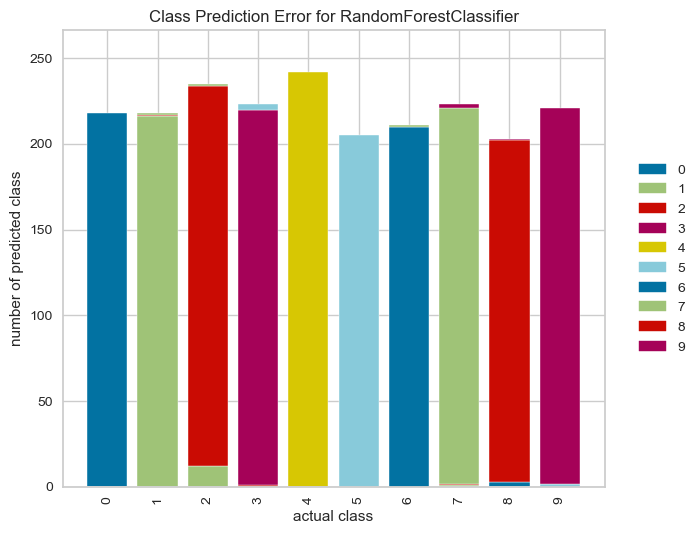

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [61]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### RF GridsearchCV

**RF HyperParameters**

1. **N_ESTIMATORS**: Determines the number of decision trees in the model. "How many tree models should I have?" This is the most important parameter for Random Forest (Default=100). It uses 2/3 of the data with sub-sampling to create the trees.

2. **CRITERION = GINI**: Measures the impurity of the classes in a node. It minimizes the error in the region where it's calculated. Therefore, if the Gini value is low, the error is also low. As accuracy increases, Gini approaches 0. If all classes are perfectly separated, Gini becomes 0.

   **ENTROPY**: Measures the uncertainty of the classes in a node and represents the amount of information (information gain). If the classes in a node are homogeneous, the entropy value will be low. If all the classes are the same in a node, entropy approaches zero. In short, it represents chaos, and we aim for the least amount of chaos!

   As accuracy increases, both Gini and entropy approach 0!

3. **MAX_DEPTH**: A hyperparameter that determines the maximum depth of the decision tree. It controls how deep the tree can go (number of steps). Adding depth helps reduce bias.

4. **MIN_SAMPLES_SPLIT**: A hyperparameter that specifies how many samples are needed in a node before it can be split. It determines the minimum number of samples required for a node to be split. The default value is 2. This means if there are at least 2 samples, splitting continues. If no error remains, it stops. Adjusting this parameter requires careful attention, so it's usually not changed at the initial stages.

5. **MAX_FEATURES**: Specifies the maximum number of features to be used in a single tree. It searches through all features to ask, "Which feature can I ask the best question?" Unlike in Decision Tree models, it selects the best feature from the square root of the total features. For example, if there are 8 features, it takes the square root and rounds down to 2, then selects the best feature from these two. This helps prevent overfitting compared to a Decision Tree model (Default='auto').

6. **MAX_LEAF_NODE**: Specifies the maximum number of leaf nodes a decision tree can create.

7. **BOOTSTRAP**: This is the parameter that makes the model a Random Tree Model. It randomly selects 2/3 of the samples in the dataset for each tree and selects subsamples based on the max_feature to build the trees. Thus, each decision tree is trained on a different subset, ensuring that each tree is independent and learns different features. This random selection improves generalization on the training set and improves scores (Default=True).

8. **CLASS_WEIGHT**: If desired, a balancing operation can be applied, similar to Logistic Regression (Default=None).

9. **MAX_SAMPLES**: If set to 'none', it takes all the data, but if set to 0.8, it uses 80% of the data. Random Forest then takes 2/3 of this 80% to create the trees. So, it gives each tree 80% of the dataset as samples (Default=None).

In [62]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [63]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [64]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180,
 'n_estimators': 100}

In [65]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [66]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.977262391996362, 0.9936312976231093, 0.9773749290358026, 0.9936682721807774)

In [67]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[219   0   0   0   0   0   0   0   2   0]
 [  0 215  13   0   0   0   0   1   0   0]
 [  0   1 221   1   0   0   0   2   0   0]
 [  0   1   0 217   0   1   0   0   0   0]
 [  0   0   0   0 240   0   0   0   0   2]
 [  0   0   0   4   0 200   0   0   1   5]
 [  0   0   0   0   0   0 209   0   1   0]
 [  0   5   1   2   0   0   0 213   1   0]
 [  0   0   0   0   0   0   0   0 199   0]
 [  0   1   0   2   0   0   0   2   1 216]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[922   0   0   0   0   0   0   0   0   0]
 [  0 884  17  13   0   0   0   0   0   0]
 [  0   0 916   2   0   0   0   1   0   0]
 [  0   4   2 827   0   1   0   2   0   0]
 [  0   1   0   0 899   0   0   0   0   2]
 [  0   0   0   1   0 843   0   0   0   1]
 [  0   0   0   0   0   1 845   0   0   0]
 [  0   1   1   2   0   0   0 916   0   0]
 [  0   0   0   0   0   0   0   0 856   0]
 [  0   1   0   2   1   0   0   0   0 829]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

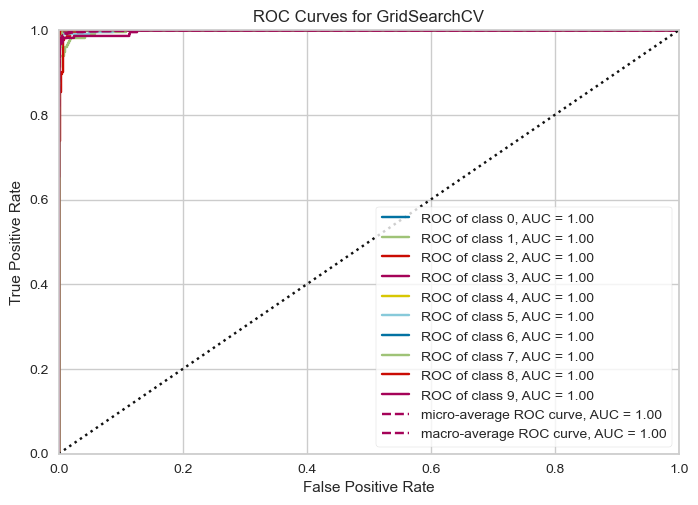

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

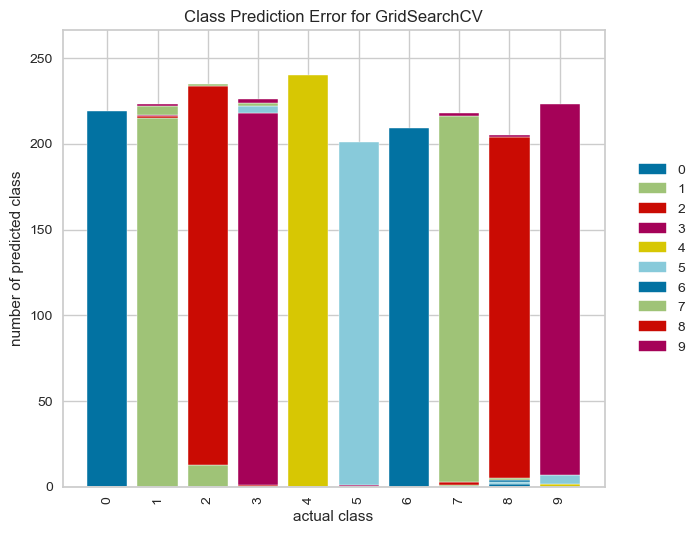

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [69]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Compare The Models

## Accuracy Comparison

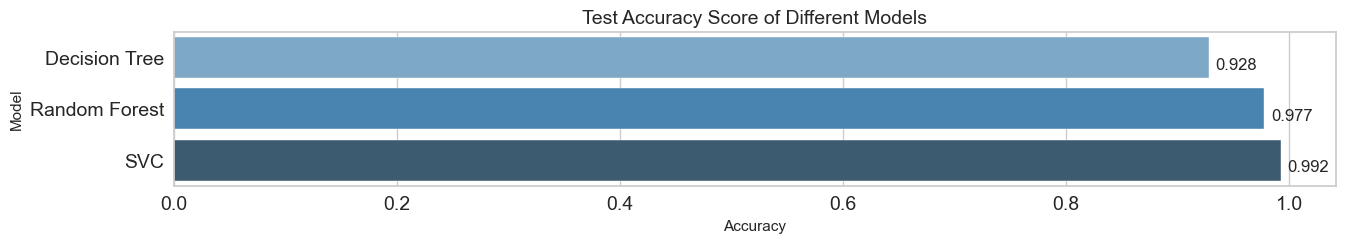

In [70]:
compare = pd.DataFrame({"Model": ["SVC", "Decision Tree", "Random Forest"],
                        "Accuracy": [SVM_accuracy_test, DT_accuracy_test, rfc_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

## F1 Score Comparison

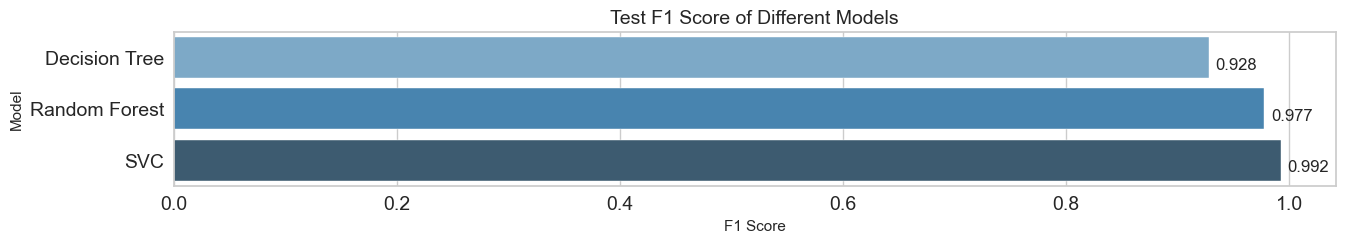

In [71]:
compare = pd.DataFrame({"Model": ["SVC", "Decision Tree", "Random Forest"],
                        "F1 Score": [svm_f1_test, DT_f1_test, rfc_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);